In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,cache=True)
mnist.target = mnist.target.astype(np.int8)
type(mnist)

sklearn.utils.Bunch

In [3]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [4]:
sort_by_target(mnist)
mnist['data'],mnist['target']

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
X,y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
def show_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, mpl.cm.binary, interpolation = "nearest")
    plt.axis("off")

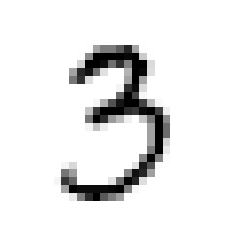

In [9]:
sample_number = X[20000]
show_digit(sample_number)

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## **Binary Classifier**

In [11]:
y_train_3 = (y_train==3)
y_test_3 = (y_test==3)

In [12]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=5,tol=-np.infty, random_state=42)
sgd.fit(X_train,y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [13]:
sgd.predict([sample_number])

array([ True])

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.9656 , 0.9656 , 0.96025])

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train_3,cv=3)

In [16]:
y_train_pred

array([False, False, False, ..., False, False,  True])

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3,y_train_pred)

array([[52855,  1014],
       [ 1157,  4974]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_train_3,y_train_pred)

0.8306613226452906

In [19]:
recall_score(y_train_3,y_train_pred)

0.811286902625999

In [20]:
f1_score(y_train_3,y_train_pred)

0.8208598069147619

In [21]:
from sklearn.model_selection import cross_val_predict 
y_train_score = cross_val_predict(sgd, X_train, y_train_3, cv=3, method="decision_function")

In [22]:
y_train_score

array([-171556.77230052, -392589.61325992, -242324.3880598 , ...,
       -488788.09426895, -320464.76927729,   88044.02927396])

In [23]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_3,y_train_score)

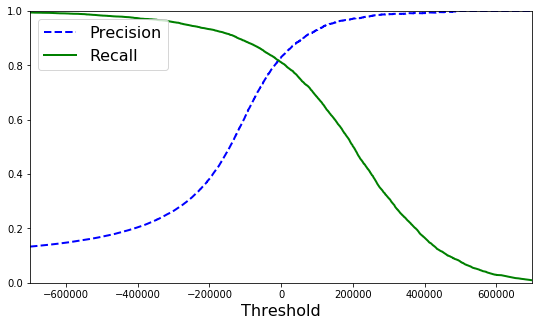

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(9, 5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [25]:
y_train_score[20000]

199050.85291361148

In [26]:
precision_score(y_train_3,(y_train_score>70000))

0.9089613034623218

In [27]:
recall_score(y_train_3,(y_train_score>70000))

0.7279399771652258

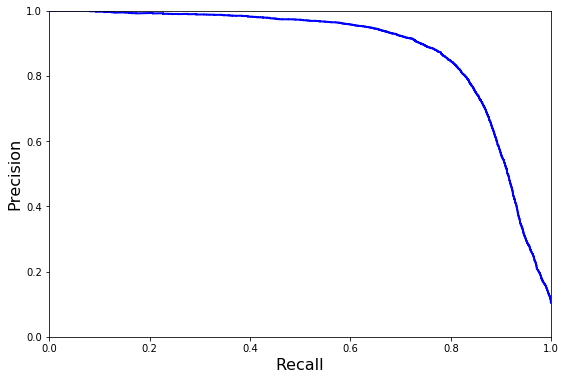

In [28]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(9, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [29]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_3,y_train_score)

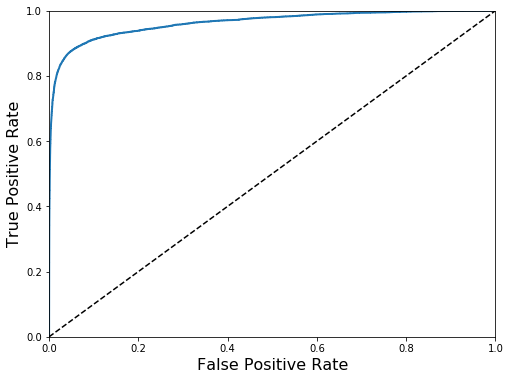

In [30]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_3,y_train_score)

0.9628501655273295

## **Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, random_state=42)
y_predict_forest = cross_val_predict(forest, X_train, y_train_3, cv=3, method="predict_proba")

In [33]:
y_forest_scores = y_predict_forest[:, 1] # score = proba of positive class
false_positive_rate_forest, true_positive_rate_forest, thresholds_forest = roc_curve(y_train_3,y_forest_scores)

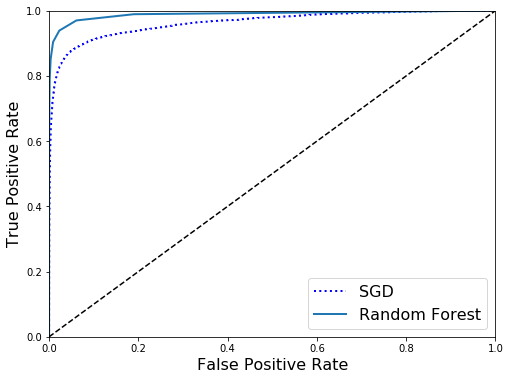

In [34]:
plt.figure(figsize=(8,6))
plt.plot(false_positive_rate, true_positive_rate, "b:", linewidth=2, label="SGD")
plot_roc_curve(false_positive_rate_forest, true_positive_rate_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [35]:
roc_auc_score(y_train_3,y_forest_scores)

0.9886158250865134

In [36]:
y_predict_forest_score = cross_val_predict(forest, X_train, y_train_3, cv=3)
precision_score(y_train_3,y_predict_forest_score)

0.9843686561104344

In [37]:
recall_score(y_train_3,y_predict_forest_score)

0.7908987114663187

## **KNN classifier**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='distance')

In [39]:
knn_predict = knn.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn_predict)

0.9691

In [41]:
from sklearn.model_selection import GridSearchCV

parameter_grid = [
        {
        'weights':["uniform","distance"],
        'n_neighbors': [3,4,5]
        }
    ]

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameter_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [43]:
grid_search.best_score_

0.9735833333333334

In [44]:
y_knn_predict = grid_search.predict(X_test)
accuracy_score(y_test,y_knn_predict)

0.9714

## **MultiClass Classifier**

**OneVsAll Classifier - SGDClassifier**

In [48]:
sgd.fit(X_train,y_train)
sgd.predict([X[15000]])

array([2], dtype=int8)

In [49]:
y[15000]

2

In [51]:
sgd.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train.astype(np.float64))

In [54]:
cross_val_score(sgd, X_scaled_train, y_train,cv=3, scoring="accuracy")

array([0.9132 , 0.90815, 0.9087 ])

In [56]:
y_train_predict = cross_val_predict(sgd, X_scaled_train, y_train, cv=3)
confusion_mtx = confusion_matrix(y_train,y_train_predict)
confusion_mtx

array([[5735,    2,   22,   14,   10,   40,   49,    8,   40,    3],
       [   2, 6469,   55,   25,    6,   41,    6,    9,  114,   15],
       [  51,   33, 5346,  102,   78,   22,   94,   61,  156,   15],
       [  44,   42,  144, 5344,    3,  237,   35,   58,  130,   94],
       [  21,   23,   30,    8, 5372,    8,   53,   30,   84,  213],
       [  79,   42,   31,  190,   80, 4593,  112,   28,  172,   94],
       [  31,   26,   42,    2,   37,   88, 5633,    8,   50,    1],
       [  28,   17,   56,   31,   57,    9,    8, 5804,   13,  242],
       [  52,  161,   74,  154,   17,  156,   56,   27, 5012,  142],
       [  44,   38,   25,   81,  157,   38,    3,  190,   80, 5293]],
      dtype=int64)

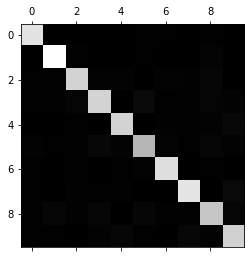

In [58]:
plt.matshow(confusion_mtx, cmap=plt.cm.gray)

**OneVsOne Classifier - SGDClassifier**

In [64]:
from sklearn.multiclass import OneVsOneClassifier
ovo_classifier = OneVsOneClassifier(SGDClassifier(max_iter=5,tol=-np.infty, random_state=42))
ovo_classifier.fit(X_scaled_train,y_train)
ovo_classifier.predict([sample_number])

array([3], dtype=int8)

In [65]:
cross_val_score(ovo_classifier, X_scaled_train, y_train,cv=3, scoring="accuracy")

array([0.91635, 0.90945, 0.91635])

In [66]:
ovo_classifier.estimators_

(SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
               n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
               random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
               verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
               n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
               random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
               verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       

**Random Forest**

In [68]:
forest.fit(X_train,y_train)
forest.predict([sample_number])

array([3], dtype=int8)

In [73]:
forest.predict_proba([sample_number])

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [76]:
y_forest_predict = forest.predict(X_test)
y_forest_predict

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [77]:
cross_val_score(forest, X_train, y_train, cv=3, scoring="accuracy")

array([0.9396 , 0.94115, 0.9399 ])

In [81]:
f1_score(y_test, y_forest_predict, average="micro")

0.9503